In [48]:

import numpy as np
import matplotlib.pyplot as plt
# Function to read the binary radar data file
def read_bin_file(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2, 0)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 & (1 << 15)) != 0
    adcData1[neg] = adcData1[neg] - (1 << 16)

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = adcData1.reshape(numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops)
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))
    return adcData1Complex

fileFullPath =  'D:\Drone-Swarm-Detection-with-AWR2243\Our data\metal_plate_distance_3m\master_0000_data.bin'
frameIdx = 127  # Index of the frame you want to read
numSamplePerChirp = 256  # Number of samples per chirp (replace with actual value)
numChirpPerLoop = 12  # Number of chirps per loop (replace with actual value)
numLoops = 64  # Number of loops per frame (replace with actual value)
numRXPerDevice = 4  # Number of receiving channels per device (replace with actual value)
numDevices = 4  # Number of devices in the cascade (adjust based on your setup)

adcData1Complex = read_bin_file(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)
# Specify the loop and antenna index
loopIdx = 34  # Loop number (5th loop)
antennaIdx = 1  # Antenna number (3rd antenna)

chirp_ADC_matrix = adcData1Complex[:, loopIdx, antennaIdx, :]

chirp_ADC_matrix = np.squeeze(chirp_ADC_matrix)
print(adcData1Complex[0][0][0][0])

  

(65351+515j)


<>:22: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_21560\243466288.py:22: SyntaxWarning: invalid escape sequence '\D'
  fileFullPath =  'D:\Drone-Swarm-Detection-with-AWR2243\Our data\metal_plate_distance_3m\master_0000_data.bin'


In [71]:
import numpy as np

def read_bin_file(file_full_path, frame_idx, num_sample_per_chirp, num_chirp_per_loop, num_loops, num_rx_per_device):
    expected_num_samples_per_frame = num_sample_per_chirp * num_chirp_per_loop * num_loops * num_rx_per_device * 2
    
    try:
        with open(file_full_path, 'rb') as fp:
            # Move to the desired frame in the file
            fp.seek((frame_idx - 1) * expected_num_samples_per_frame * 2)
            adc_data1 = np.fromfile(fp, dtype=np.uint16, count=expected_num_samples_per_frame)
    except FileNotFoundError:
        raise FileNotFoundError('File could not be opened.')
    
    # Convert the 16-bit data to signed integers
    adc_data1 = adc_data1.astype(np.int16)
    
    # Combine the I and Q channels into complex values
    adc_data1_complex = adc_data1[0::2] + 1j * adc_data1[1::2]
    
    # Reshape and permute the data
    adc_data1_complex = adc_data1_complex.reshape((num_rx_per_device, num_sample_per_chirp, num_chirp_per_loop, num_loops))
    adc_data1_complex = np.transpose(adc_data1_complex, (1, 3, 0, 2))
    
    return adc_data1_complex

# Define file path and parameters
file_full_path = 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/metal_plate_distance_3m/master_0000_data.bin'
frame_idx = 49
num_sample_per_chirp = 256
num_chirp_per_loop = 12
num_loops = 64
num_rx_per_device = 4
num_devices = 4  # Number of devices in the cascade (if needed)

# Read radar data
adc_data_complex = read_bin_file(file_full_path, frame_idx, num_sample_per_chirp, num_chirp_per_loop, num_loops, num_rx_per_device)
print(adc_data_complex.shape)
print(adc_data_complex[0][2][0][0])

# # Select antenna index and extract chirp ADC matrix
antenna_idx = 0  # Python uses 0-based indexing
chirp_adc_matrix = np.squeeze(adc_data_complex[:, :, antenna_idx, :])

# # Display matrix size (should be [num_sample_per_chirp, num_loops, num_chirp_per_loop])
print(chirp_adc_matrix.shape)

# # Extract first chirp of the first loop
first_chirp_first_loop = chirp_adc_matrix[:, 0, 0]
# print(first_chirp_first_loop.shape)  # Should be (num_sample_per_chirp,)
# print(first_chirp_first_loop[:10])  # Display first 10 samples for verification


(256, 64, 4, 12)
(515-102j)
(256, 64, 12)


In [59]:
# Define the value to check
value_to_check =  -330 + 291j

# Check if the value exists in the matrix
exists = np.isin(value_to_check, chirp_adc_matrix)

if exists:
    print(f"{value_to_check} is present in the matrix.")
else:
    print(f"{value_to_check} is not present in the matrix.")

(-330+291j) is present in the matrix.


In [66]:
# Define the value to check
value_to_check = 23 + 463j

# Flag to track if value is found
found = False

# Loop through the matrix to find the value and print its index
for p in range(chirp_adc_matrix.shape[0]):
    for l in range(chirp_adc_matrix.shape[1]):
        for o in range(chirp_adc_matrix.shape[2]):
            if chirp_adc_matrix[p][l][o] == value_to_check:
                print(f"{value_to_check} found at chirp_adc_matrix[{p}][{l}][{o}]")
                found = True
                break
        if found:
            break
    if found:
        break

if not found:
    print(f"{value_to_check} is not present in the matrix.")


(23+463j) found at chirp_adc_matrix[0][0][0]


In [67]:

# Define the value to check
value_to_check =    -196 + 201j
# Flag to track if value is found
found = False

# Loop through the matrix to find the value and print its index
for p in range(chirp_adc_matrix.shape[0]):
    for l in range(chirp_adc_matrix.shape[1]):
        for o in range(chirp_adc_matrix.shape[2]):
            if chirp_adc_matrix[p][l][o] == value_to_check:
                print(f"{value_to_check} found at chirp_adc_matrix[{p}][{l}][{o}]")
                found = True
                break
        if found:
            break
    if found:
        break

if not found:
    print(f"{value_to_check} is not present in the matrix.")

(-196+201j) found at chirp_adc_matrix[0][4][0]


In [74]:

# Define the value to check
value_to_check =    -155 + 284j
# Flag to track if value is found
found = False

# Loop through the matrix to find the value and print its index
for p in range(chirp_adc_matrix.shape[0]):
    for l in range(chirp_adc_matrix.shape[1]):
        for o in range(chirp_adc_matrix.shape[2]):
            if chirp_adc_matrix[p][l][o] == value_to_check:
                print(f"{value_to_check} found at chirp_adc_matrix[{p}][{l}][{o}]")
                found = True
                break
        if found:
            break
    if found:
        break

if not found:
    print(f"{value_to_check} is not present in the matrix.")

(-155+284j) found at chirp_adc_matrix[1][60][3]


In [80]:
chirp_adc_matrix[:][:]

array([[[  23.+463.j, -311.+355.j,   34. +18.j, ...,  351.+269.j,
          -40.+670.j, -434.+328.j],
        [ -52.-105.j, -261. +28.j,  -87.-218.j, ...,   85.+378.j,
         -286.+563.j, -701. -43.j],
        [ 515.-102.j, -157. -99.j, -369.-402.j, ..., -208. -92.j,
          -45. -44.j, -142.-362.j],
        ...,
        [-163. +33.j, -170.+232.j,    4.-390.j, ...,  137.+329.j,
         -329.+501.j, -664. -99.j],
        [-269.-126.j, -108.+153.j,   19.-614.j, ...,  239.-182.j,
          -40. +17.j, -101.-141.j],
        [ 404.-562.j,  720. +32.j,  254.+175.j, ...,  204.+132.j,
          -91.+204.j, -237.+194.j]],

       [[-288.-119.j,  223.-185.j,   75.+317.j, ..., -113. +33.j,
         -127.-135.j,  243.-415.j],
        [-233.-480.j,   98.-436.j,  156. -90.j, ..., -198.+305.j,
         -347.-157.j,  -27.-284.j],
        [ 377.-480.j,  468.-115.j,  576.+201.j, ...,  417.+311.j,
          154.+217.j, -373.+345.j],
        ...,
        [-176.-371.j,  -64.-365.j,  158.-310.j, ..., -

In [81]:
import numpy as np

# Define file path and parameters
fileFullPath = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\metal_plate_distance_3m\master_0000_data.bin'
frameIdx = 49  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops))
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex

# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 0  # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]

# Display some results
print(adcDataComplex[1, 0, 0, 0])  # Display sample value
print("Size of chirp_ADC_matrix:", chirp_ADC_matrix.shape)

# Extract first chirp of the first loop
first_chirp_first_loop = chirp_ADC_matrix[:, 0, 0]
print("Size of first_chirp_first_loop:", first_chirp_first_loop.shape)
print(first_chirp_first_loop)


(-288-119j)
Size of chirp_ADC_matrix: (256, 64, 12)
Size of first_chirp_first_loop: (256,)
[  23.+463.j -288.-119.j  662. +66.j  204.+120.j   42.+460.j -274.-133.j
  667. +43.j  215.+130.j   43.+452.j -270.-130.j  674. +57.j  227.+137.j
   38.+460.j -269.-139.j  672. +42.j  206.+129.j   55.+479.j -288.-136.j
  662. +55.j  216.+123.j   41.+442.j -278.-129.j  669. +47.j  203.+150.j
   35.+444.j -287.-117.j  669. +42.j  203.+139.j   23.+443.j -276.-149.j
  664. +42.j  191.+138.j   41.+450.j -270.-124.j  675. +75.j  223.+110.j
   32.+441.j -271.-127.j  679. +61.j  212.+129.j   41.+455.j -273.-122.j
  669. +62.j  180.+142.j   26.+446.j -286.-136.j  683. +50.j  204.+129.j
   46.+450.j -283.-134.j  674. +55.j  208.+132.j   26.+454.j -280.-139.j
  663. +57.j  210.+127.j   25.+455.j -278.-129.j  659. +63.j  221.+129.j
   43.+458.j -280.-129.j  673. +50.j  195.+123.j   39.+465.j -279.-132.j
  668. +54.j  205.+122.j   47.+465.j -278.-114.j  658. +42.j  212.+132.j
   26.+454.j -276.-130.j  674. +5

Size of chirp_ADC_matrix_2D: (768, 256)
[[  23.+463.j -288.-119.j  662. +66.j ... -280.-136.j  650. +64.j
   189.+125.j]
 [-311.+355.j  223.-185.j  373.+257.j ...  223.-188.j  342.+247.j
  -103. +31.j]
 [  34. +18.j   75.+317.j  -41.+676.j ...   50.+319.j  -56.+679.j
  -106.-114.j]
 ...
 [ 204.+132.j -318.  -1.j  721. +27.j ... -325.  +0.j  721. +30.j
    19.-445.j]
 [ -91.+204.j -283.-326.j  268.+192.j ... -257.-338.j  262.+199.j
   396.-189.j]
 [-237.+194.j   38. -71.j  -89.+475.j ...   22. -84.j -124.+480.j
   285.+245.j]]


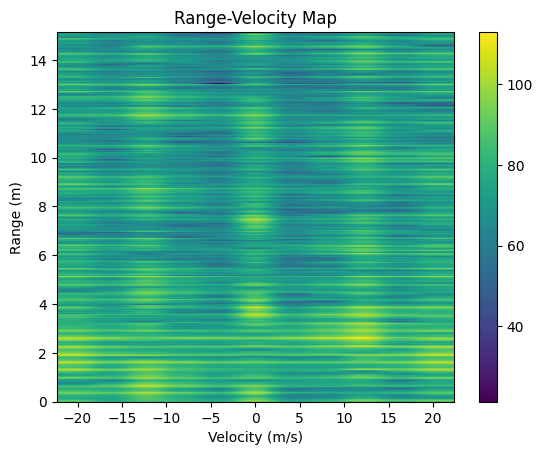

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define file path and parameters
fileFullPath = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\metal_plate_distance_3m\master_0000_data.bin'
frameIdx = 49  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops))
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 0  # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]

# Reshape chirp_ADC_matrix to get a 2D array (768 chirps, 256 samples per chirp)
chirp_ADC_matrix_2D = chirp_ADC_matrix.reshape(numSamplePerChirp, numChirpPerLoop * numLoops).T
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)
# Display some results
print("Size of chirp_ADC_matrix_2D:", chirp_ADC_matrix_2D.shape)
print(chirp_ADC_matrix_2D)
Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 11# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirp_ADC_matrix_2D, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()


# Now chirp_ADC_matrix_2D contains 768 chirps, each with 256 samples


In [1]:
import numpy as np
import matplotlib.pyplot as plt
frameIdx = 49  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Path to the .txt file
file_path = 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/chirp_samples_fly_drone_4.txt'

# Function to parse the string format into a complex number
def parse_complex_string(complex_str):
    # Clean and split the string at ' + j*' to separate real and imaginary parts
    real, imag = complex_str.replace(' ', '').split('+j*')
    return complex(float(real), float(imag))

# Read the file, strip any extra spaces, and parse each line into complex numbers
with open(file_path, 'r') as f:
    complex_numbers = [parse_complex_string(line.strip()) for line in f.readlines()]

# Convert the list of complex numbers into a NumPy array
complex_array = np.array(complex_numbers)

# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.reshape(complex_array, (256, 768))
chirps_matrix=np.transpose(chirps_matrix)
# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)

Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 97# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration*35)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow((np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/chirp_samples_fly_drone_4.txt'

[[ -476. -345.j  -675. -166.j -1038.  -79.j ... -1681. -676.j
  -1712. -958.j -1333.-1210.j]
 [ -456. +101.j  -797. -187.j -1025. -606.j ...  -595.-1465.j
   -297.-1412.j    23.-1100.j]
 [-1135. +547.j -1053.  +21.j  -860. -303.j ...   134. -142.j
     90. +224.j  -122. +575.j]
 ...
 [ 1731. +699.j  1505.+1023.j  1468. +932.j ...  1210.+1068.j
   1127. +835.j  1120. +647.j]
 [ 1154. +874.j   942. +748.j   903. +621.j ...   929. +638.j
   1017. +485.j  1335. +344.j]
 [  942. +581.j   909. +357.j  1139. +268.j ...  1015. +303.j
   1246. +370.j  1249. +651.j]]


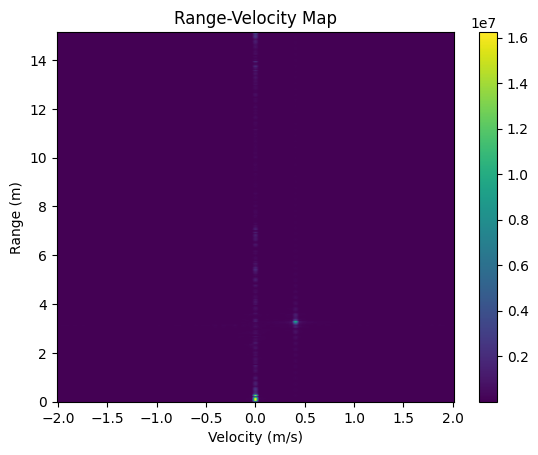

In [4]:
import numpy as np
import matplotlib.pyplot as plt
frameIdx = 49  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Path to the .txt file
file_path = 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/chirp_samples_fly_drone_9.txt'

# Function to parse the string format into a complex number
def parse_complex_string(complex_str):
    # Clean and split the string at ' + j*' to separate real and imaginary parts
    real, imag = complex_str.replace(' ', '').split('+j*')
    return complex(float(real), float(imag))

# Read the file, strip any extra spaces, and parse each line into complex numbers
with open(file_path, 'r') as f:
    complex_numbers = [parse_complex_string(line.strip()) for line in f.readlines()]

# Convert the list of complex numbers into a NumPy array
complex_array = np.array(complex_numbers)

# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.reshape(complex_array, (256, 768))
chirps_matrix=np.transpose(chirps_matrix)
# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)

Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 99# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration*100)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow((np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

[[ -906. -192.j -1166. -288.j -1398. -502.j ... -1016. -487.j
  -1234. -645.j -1217. -838.j]
 [ -875. -450.j  -896. -941.j  -703.-1068.j ...  -920. -726.j
   -663. -864.j  -436. -853.j]
 [ -808.  -69.j  -519. -131.j  -451.  +18.j ...  -421. -239.j
   -541.  +86.j  -528. +221.j]
 ...
 [ 1334. +604.j  1433. +767.j  1323. +691.j ...  1363. +631.j
   1145. +604.j  1214. +499.j]
 [ 1170. +599.j  1054. +629.j   985. +557.j ...  1059. +505.j
   1183. +476.j  1192. +531.j]
 [ 1155. +532.j  1105. +385.j  1223. +403.j ...  1249. +442.j
   1347. +543.j  1222. +619.j]]


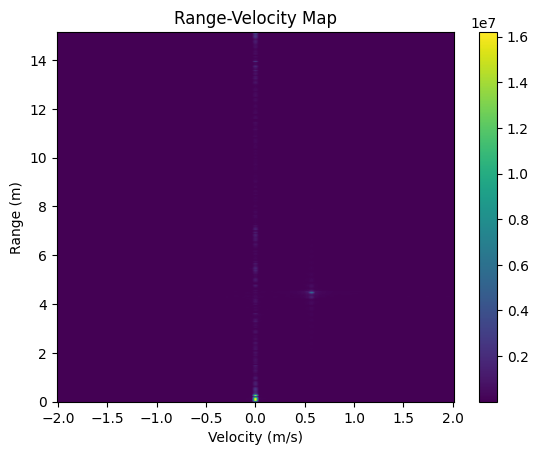

In [5]:
import numpy as np
import matplotlib.pyplot as plt
frameIdx = 49  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Path to the .txt file
file_path = 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/chirp_samples_fly_drone_11.txt'

# Function to parse the string format into a complex number
def parse_complex_string(complex_str):
    # Clean and split the string at ' + j*' to separate real and imaginary parts
    real, imag = complex_str.replace(' ', '').split('+j*')
    return complex(float(real), float(imag))

# Read the file, strip any extra spaces, and parse each line into complex numbers
with open(file_path, 'r') as f:
    complex_numbers = [parse_complex_string(line.strip()) for line in f.readlines()]

# Convert the list of complex numbers into a NumPy array
complex_array = np.array(complex_numbers)

# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.reshape(complex_array, (256, 768))
chirps_matrix=np.transpose(chirps_matrix)
# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)

Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 99# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration*100)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow((np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

(1167+557j)
(-1217-838j)


TypeError: Invalid shape (64,) for image data

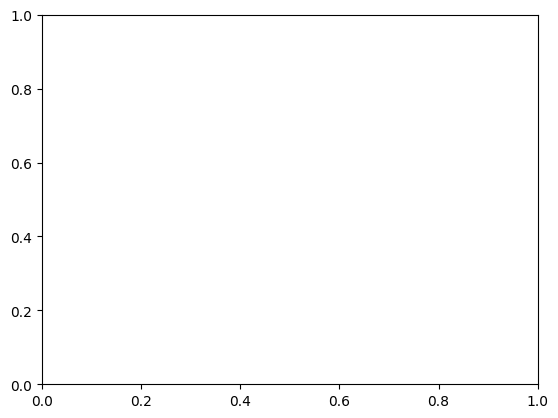

In [68]:
import numpy as np
import matplotlib.pyplot as plt
frameIdx = 55  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Path to the .txt file
file_path = 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/chirp_samples_fly_drone_11.txt'

# Function to parse the string format into a complex number
def parse_complex_string(complex_str):
    # Clean and split the string at ' + j*' to separate real and imaginary parts
    real, imag = complex_str.replace(' ', '').split('+j*')
    return complex(float(real), float(imag))

# Read the file, strip any extra spaces, and parse each line into complex numbers
with open(file_path, 'r') as f:
    complex_numbers = [parse_complex_string(line.strip()) for line in f.readlines()]

# Convert the list of complex numbers into a NumPy array
complex_array = np.array(complex_numbers)

# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.reshape(complex_array, (256, 768))
print(chirps_matrix[0][255])
chirps_matrix=np.transpose(chirps_matrix)
# Output the reshaped matrix
print(chirps_matrix[0][255])
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)

# Number of FFT points for the range and Doppler dimensions
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))
Nfft_doppler = 2 ** int(np.ceil(np.log2(numLoops)))

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

(31+33j)
(25-68j)


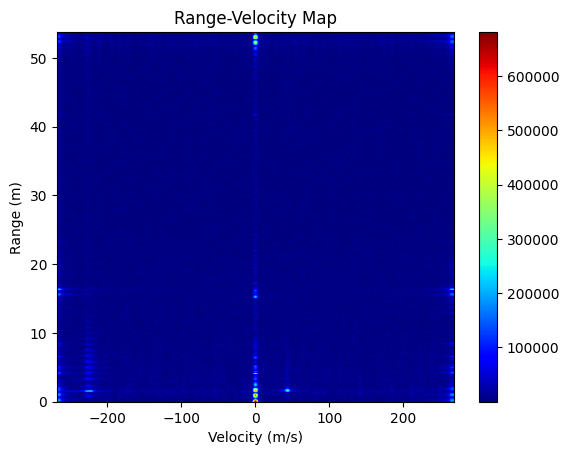

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define file path and parameters
fileFullPath = r'E:\Data_Set\Phanton_4_forward_02\new_four\master_0000_data.bin';
frameIdx = 9# Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 128 # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops), order='F')
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex

# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 3 # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]



# Extract first chirp of the first loop
first_chirp_first_loop = chirp_ADC_matrix[:, 0, 0]

# Initialize an empty list to store each chirp
all_chirps = []
# Loop over loops and chirps per loop
for i in range(numLoops):
    for j in range(numChirpPerLoop):
        # Append each chirp to the list
        all_chirps.append(chirp_ADC_matrix[:, i, j])

# Convert the list to a numpy array and reshape it to (768, 256)
all_chirps = np.array(all_chirps).reshape(256,1536)


chirps_matrix =all_chirps 
print(chirps_matrix[0][1])
chirps_matrix=np.transpose(chirps_matrix)
# Output the reshaped matrix
print(chirps_matrix[0][1])
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 0.89e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 30e-6  # Chirp duration (40 microseconds)

Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 99# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow((np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

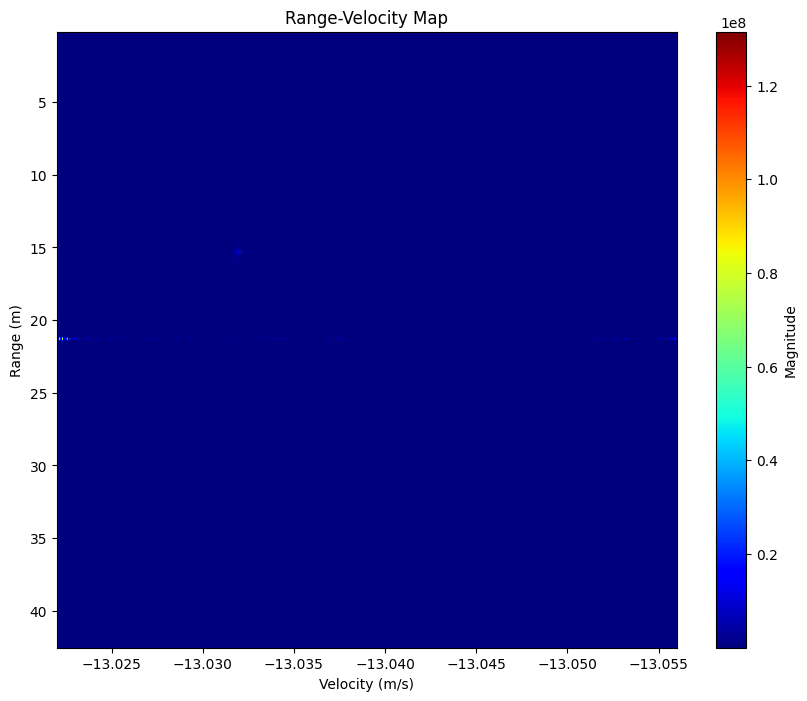

In [83]:
def convert_range_bins_to_range(range_bins, range_resolution=0.1668):
    #range_resolution = speedOfLight/(2*chirpBandwidth)
    #maxRange            = speedOfLight*adcSampleRate*chirpRampTime/(2*chirpBandwidth);
    return range_bins * range_resolution

def convert_doppler_bins_to_velocity(doppler_bins, velocity_resolution=0.034):
    #maximumVelocity     = lambda / (chirpInterval*4) ; % m/s
    # velocityResolution  = lambda / (2*nchirp_loops * chirpInterval*numTxAnt);
    return doppler_bins * velocity_resolution
# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, axis=0)


# Perform 1D FFT across the Doppler dimension (chirps) after the range FFT
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, axis=1), axes=1)

# Compute the magnitude (absolute value) of the result
magnitude = np.abs(doppler_fft)




# Convert range and Doppler bins to physical units
range_bins = np.arange(magnitude.shape[1])
doppler_bins = np.arange(-magnitude.shape[0]//2, magnitude.shape[0]//2)

range_meters = convert_range_bins_to_range(range_bins)
velocity_mps = convert_doppler_bins_to_velocity(doppler_bins)

magnitude = np.rot90(magnitude)
# Plot the Range-Doppler Map with velocity on the x-axis and range on the y-axis
plt.figure(figsize=(10, 8))
plt.imshow(magnitude, aspect='auto', cmap='jet', 
            extent=[velocity_mps[1], velocity_mps[0], range_meters[-1], range_meters[1]])
plt.colorbar(label='Magnitude')
plt.title('Range-Velocity Map')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.show()

(27+13j)
(7-92j)


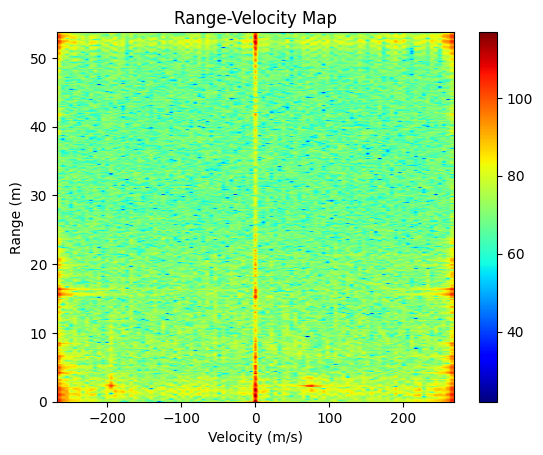

In [53]:
import numpy as np
import matplotlib.pyplot as plt
frameIdx = 55  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 128  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Path to the .txt file
file_path = 'D:/Drone-Swarm-Detection-with-AWR2243/Our data/chirp_samples_fly_drone_15.txt'

# Function to parse the string format into a complex number
def parse_complex_string(complex_str):
    # Clean and split the string at ' + j*' to separate real and imaginary parts
    real, imag = complex_str.replace(' ', '').split('+j*')
    return complex(float(real), float(imag))

# Read the file, strip any extra spaces, and parse each line into complex numbers
with open(file_path, 'r') as f:
    complex_numbers = [parse_complex_string(line.strip()) for line in f.readlines()]

# Convert the list of complex numbers into a NumPy array
complex_array = np.array(complex_numbers)

# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.reshape(complex_array, (256, 1536))
print(chirps_matrix[0][1])
chirps_matrix=np.transpose(chirps_matrix)
# Output the reshaped matrix
print(chirps_matrix[0][1])
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 0.89e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 30e-6  # Chirp duration (40 microseconds)

Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 99# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

In [19]:

# Radar parameters
num_frames = 128  # Number of frames
num_chirps = 64   # Number of chirps per frame
num_samples = 256  # Number of ADC samples per chirp
num_rx = 4         # Number of receiving channels

# Total data points per frame: chirps * samples * channels * 2 (I/Q data)
points_per_frame = num_chirps * num_samples * num_rx * 2

# File path for master bin file
file_path = r'D:\Our data\Propeller_ON_UAV_Drone\Gishan_only_new_drone_inclined_with_propelrs\master_0000_data.bin'

def read_master_bin(file_path):
    """
    Reads the master .bin file containing raw radar ADC samples.
    
    Args:
        file_path (str): The path to the master .bin file.
    
    Returns:
        np.ndarray: A 4D complex array with shape (frames, chirps, samples, channels).
    """
    # Read the raw binary data from the file as 16-bit signed integers
    data = np.fromfile(file_path, dtype=np.int16)

    # Check if the data size matches the expected size
    expected_size = num_frames * num_chirps * num_samples * num_rx * 2
    if data.size != expected_size:
        raise ValueError(f"Data size mismatch. Expected {expected_size} but got {data.size}.")

    # Reshape the data into a 5D array (frames, chirps, samples, channels, 2)
    data = data.reshape((num_frames, num_chirps, num_samples, num_rx, 2))

    # Combine I (real) and Q (imaginary) data to form complex samples
    radar_data = data[..., 0] + 1j * data[..., 1]

    return radar_data

# Read and process the master bin file
try:
    master_data = read_master_bin(file_path)
    print("Data successfully read and processed.")

    # Example of accessing the data: frame 0, chirp 0, all samples, channel 0
    print("Sample data from frame 0, chirp 0, channel 0:")
    print(master_data[0, 0, :, 0])  # Prints complex samples for the first chirp of the first frame, channel 0

except Exception as e:
    print(f"Error reading file: {e}")


Error reading file: Data size mismatch. Expected 16777216 but got 199753728.


In [14]:
import numpy as np

# Define the file path (modify if needed)
file_path = 'D:\Drone-Swarm-Detection-with-AWR2243\Our data\complex_data_output.txt'


# Step 1: Read the complex values from the file
with open(file_path, 'r') as file:
    data = file.readlines()

# Step 2: Clean and parse the complex numbers
complex_values = []
for line in data:
    clean_line = line.strip().replace(' ', '')  # Remove extra spaces
    clean_line = clean_line.replace('+-', '-')  # Replace '+-' with '-'
    try:
        complex_values.append(complex(clean_line))  # Convert to complex number
    except ValueError:
        print(f"Skipping malformed line: {line}")

# Step 3: Convert the list of complex values to a NumPy array
complex_array = np.array(complex_values)

# Step 4: Reshape the array to the desired shape (12, 256)
if complex_array.size == 3072:  # Ensure the data has the correct number of elements
    reshaped_array = complex_array.reshape(12, 256)
    print(reshaped_array)
else:
    print(f"Expected 3072 complex values but got {complex_array.size}. Check the input file.")




[[ 401. -62.j  415. -71.j  406. -67.j ...  230. +50.j  227. +27.j
   240. +41.j]
 [ 241. +40.j  224. +58.j  231. +16.j ... -431.-134.j -440.-122.j
  -421.-139.j]
 [-433.-126.j -434.-116.j -436.-122.j ... -191.+191.j -193.+192.j
  -190.+167.j]
 ...
 [ 205. -11.j  188. +11.j  205.  +9.j ...  324.+102.j  325.+100.j
   300.+128.j]
 [ 312.+117.j  310.+133.j  309. +94.j ...  139.-288.j  117.-260.j
   115.-249.j]
 [ 119.-275.j  133.-266.j  122.-286.j ... -225. +15.j -253. +31.j
  -262. +25.j]]


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_2448\1544138861.py:4: SyntaxWarning: invalid escape sequence '\D'
  file_path = 'D:\Drone-Swarm-Detection-with-AWR2243\Our data\complex_data_output.txt'


In [20]:
import numpy as np

def get_valid_num_frames(adc_idx_file_name):
    """
    Reads the binary index file to extract the number of effective frames and the data file size.

    Args:
        adc_idx_file_name (str): The path to the index file.

    Returns:
        tuple: A tuple containing:
            - num_idx (int): The number of effective frames.
            - data_file_size (int): The data size for the effective number of frames.
    """
    header_info_size_1 = 6  # Number of 32-bit unsigned integers to read in the first header
    header_info_size_2 = 3  # Number of 64-bit unsigned integers to read in the second header

    # Open the index file and read the first header (6 uint32 values)
    with open(adc_idx_file_name, 'rb') as idx_file:
        header_info = np.fromfile(idx_file, dtype=np.uint32, count=header_info_size_1)
        num_idx = header_info[3]  # number of effective frames

    # Reopen the index file and read the second header (3 uint64 values)
    with open(adc_idx_file_name, 'rb') as idx_file:
        header_info = np.fromfile(idx_file, dtype=np.uint64, count=header_info_size_2)
        data_file_size = header_info[2]  # data size for the effective number of frames

    return num_idx, data_file_size

# Example usage
adc_idx_file_name = 'D:\Our data\Propeller_ON_UAV_Drone\Gishan_only_new_drone_inclined_with_propelrs\master_0000_idx.bin'  # Replace with your actual file path
num_idx, data_file_size = get_valid_num_frames(adc_idx_file_name)

print(f"Number of effective frames: {num_idx}")
print(f"Data size for the effective number of frames: {data_file_size}")


Number of effective frames: 127
Data size for the effective number of frames: 399507456


<>:31: SyntaxWarning: invalid escape sequence '\O'
<>:31: SyntaxWarning: invalid escape sequence '\O'
C:\Users\user\AppData\Local\Temp\ipykernel_21300\2985512376.py:31: SyntaxWarning: invalid escape sequence '\O'
  adc_idx_file_name = 'D:\Our data\Propeller_ON_UAV_Drone\Gishan_only_new_drone_inclined_with_propelrs\master_0000_idx.bin'  # Replace with your actual file path


In [15]:
import numpy as np
import os

def read_ADC_bin_TDA2_separateFiles(fileNameCascade, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice, numDevices):
    # Construct full file paths for master and slaves
    dataFolder = fileNameCascade['dataFolderName']
    fileFullPath_master = os.path.join(dataFolder, fileNameCascade['master'])
    fileFullPath_slave1 = os.path.join(dataFolder, fileNameCascade['slave1'])
    fileFullPath_slave2 = os.path.join(dataFolder, fileNameCascade['slave2'])
    fileFullPath_slave3 = os.path.join(dataFolder, fileNameCascade['slave3'])

    # Read binary files for master and slaves
    radar_data_Rxchain_master = readBinFile(fileFullPath_master, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice, numDevices)
    radar_data_Rxchain_slave1 = readBinFile(fileFullPath_slave1, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice, numDevices)
    radar_data_Rxchain_slave2 = readBinFile(fileFullPath_slave2, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice, numDevices)
    radar_data_Rxchain_slave3 = readBinFile(fileFullPath_slave3, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice, numDevices)

    # Initialize radar_data_Rxchain and assign the data from the different devices
    radar_data_Rxchain = np.zeros((numSamplePerChirp, numLoops, 16, numChirpPerLoop), dtype=np.complex64)
    
    radar_data_Rxchain[:, :, 0:4, :] = radar_data_Rxchain_master
    radar_data_Rxchain[:, :, 4:8, :] = radar_data_Rxchain_slave1
    radar_data_Rxchain[:, :, 8:12, :] = radar_data_Rxchain_slave2
    radar_data_Rxchain[:, :, 12:16, :] = radar_data_Rxchain_slave3

    return radar_data_Rxchain

def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    # Calculate the expected number of samples per frame
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2

    # Open the binary file and seek to the start of the required frame
    with open(fileFullPath, 'rb') as fp:
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2, os.SEEK_SET)
        
        # Read the data from the file
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Process 16-bit signed data by handling negative numbers (two's complement)
    neg = np.bitwise_and(adcData1, 0x8000) != 0
    adcData1[neg] = adcData1[neg] - 2**16

    # Convert interleaved I/Q samples into complex numbers
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape the data to the required dimensions and permute the axes
    adcData1Complex = adcData1.reshape((numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops))
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Equivalent to MATLAB's permute function

    return adcData1Complex


frameIdx=12
file_path = 'D:\\Our data\\Propeller_ON _UAV_Drone\\Gishan_only_new_drone_inclined_with_propelrs\\master_0000_data.bin'

numSamplePerChirp=256
numChirpPerLoop=12
numLoops=64
numRXPerDevice=4


import os
file_size = os.path.getsize(file_path)
print(file_size)
Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
print(Expected_Num_SamplesPerFrame)
expected_frame_size = Expected_Num_SamplesPerFrame * 2  # in bytes
max_frame_count = file_size // expected_frame_size
print(f"Max possible frame count: {max_frame_count}")
# adcData1 = np.fromfile(file_path, dtype=np.uint16)
# print(len(adcData1)) 
u=readBinFile(file_path, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)
u.shape


399507456
1572864
Max possible frame count: 127


(256, 64, 4, 12)

In [38]:
import matplotlib.pyplot as plt
def plot_range_doppler_map(adcData, numSamplePerChirp, numChirpPerLoop):
    """
    Plot the Range-Doppler map for the given radar data.
    
    Parameters:
    - adcData: The complex radar data array with shape (256, 64, 4, 12).
    - numSamplePerChirp: Number of samples per chirp (range dimension).
    - numChirpPerLoop: Number of chirps per loop (Doppler dimension).
    """
    # Select the data from one receiving antenna and one loop
    # For example, choosing the first receiving antenna (index 0) and first loop (index 0)
    rx_channel = 3
    selected_loop =63
    data = adcData[:, selected_loop, rx_channel, :]
    print(data.shape)
    data=data.transpose()  #data represents 12 chirps and each chirp has 256 complex samples
    print(data.shape)# shape of data variable is (12,256)
    print(data[0])

    # Perform Range FFT (along samples per chirp dimension)
    range_fft = np.fft.fft(data, axis=0)
    
    # Perform Doppler FFT (along chirps per loop dimension)
    doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, axis=0), axes=1)
    
    # Compute the magnitude to get the power intensity
    range_doppler_map = np.abs(doppler_fft)
    
    # # Plot the Range-Doppler Map
    # plt.figure(figsize=(10, 6))
    # plt.imshow(20 * np.log10(range_doppler_map), aspect='auto', cmap='jet',
    #            extent=[-numChirpPerLoop // 2, numChirpPerLoop // 2 - 1, 0, numSamplePerChirp - 1])
    # plt.colorbar(label='Magnitude (dB)')
    # plt.xlabel('Doppler (Velocity Bins)')
    # plt.ylabel('Range (Range Bins)')
    # plt.title('Range-Doppler Map')
    # plt.show()

# Parameters (use the ones from your data)
numSamplePerChirp = 256
numChirpPerLoop = 12
plot_range_doppler_map(u, numSamplePerChirp, numChirpPerLoop)

(256, 12)
(12, 256)
[3.4000e+01+6.5000e+01j 6.5427e+04+6.5390e+04j 2.4000e+01+4.1200e+02j
 6.5298e+04+6.5509e+04j 6.5000e+01+5.3000e+01j 6.5414e+04+6.5375e+04j
 2.0000e+01+3.8300e+02j 6.5285e+04+6.5531e+04j 5.9000e+01+4.8000e+01j
 6.5426e+04+6.5373e+04j 4.8000e+01+3.5700e+02j 6.5291e+04+8.0000e+00j
 6.6000e+01+3.5000e+01j 6.5417e+04+6.5365e+04j 4.9000e+01+3.8500e+02j
 6.5271e+04+6.5522e+04j 7.8000e+01+1.4000e+01j 6.5405e+04+6.5363e+04j
 6.9000e+01+3.6200e+02j 6.5288e+04+6.5525e+04j 7.5000e+01+4.0000e+00j
 6.5414e+04+6.5373e+04j 8.2000e+01+3.6500e+02j 6.5295e+04+3.0000e+00j
 8.8000e+01+1.3000e+01j 6.5395e+04+6.5381e+04j 8.8000e+01+3.8200e+02j
 6.5310e+04+6.5523e+04j 1.0300e+02+9.0000e+00j 6.5395e+04+6.5361e+04j
 1.0000e+02+3.7500e+02j 6.5307e+04+4.0000e+00j 1.0100e+02+0.0000e+00j
 6.5397e+04+6.5359e+04j 9.1000e+01+4.0000e+02j 6.5302e+04+6.5524e+04j
 1.1200e+02+1.5000e+01j 6.5399e+04+6.5351e+04j 7.0000e+01+4.0900e+02j
 6.5280e+04+6.5520e+04j 1.4000e+02+3.6000e+01j 6.5400e+04+6.5354e+04j


In [21]:
folder_name=r'D:\Our data\Propeller_ON_UAV_Drone\Gishan_only_new_drone_inclined_with_propelrs'

In [14]:
import numpy as np
from scipy.signal import find_peaks, windows
from scipy.fftpack import fft
from scipy.signal import butter, filtfilt
# Radar parameters
start_freq = 77e9  # 77 GHz
slope = 29.9817e12  # Hz/s
num_chirps = 128
num_samples = 256
sampling_rate = 10e6  # 10 Msps
range_resolution = 0.1953  # meters
velocity_resolution = 0.1510  # meters/second
number_of_channels = 4
number_of_frames = 256
channel=0

# Create the filter for zero Doppler clutter removal
cutoff_freq = 10  # Set cutoff frequency for the high-pass filter (Hz)
sampling_freq = 1000  # Sampling frequency (example value, should match your data)
def butter_highpass(cutoff, fs, order=6):
    """Design a Butterworth high-pass filter."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
b, a = butter_highpass(cutoff_freq, sampling_freq)
# Calculate some additional parameters
c = 3e8  # Speed of light in m/s
bandwidth = slope * (num_samples / sampling_rate)
max_range = (c * sampling_rate) / (2 * bandwidth)

def readbinfile(file_name, frame):
    data = np.fromfile(file_name, dtype=np.uint16)
    data1 = data.reshape((data.shape[0] // (128 * 256 * 8), 128, 256, 8))[:, :, :, [channel, channel + 4]][frame]
    data2 = data1 - (data1 >= np.power(2, 15)) * np.power(2, 16)
    radar_data= (data2[:, :, 0] + 1j * data2[:, :, 1]).astype(np.complex64)
  
    return radar_data
def range_fft(data):
    windowed_data = data * windows.hann(len(data))
    range_fft_result = fft(windowed_data)
    return np.abs(range_fft_result)

def findpeaksSb(range_profile):
    peaks, _ = find_peaks(range_profile)    
    distances = peaks * range_resolution
    heights = range_profile[peaks]
    widths = np.diff(peaks, append=peaks[-1]) * range_resolution
    return distances, heights, widths

# Main processing loop
range_profiles = np.zeros((number_of_frames, num_chirps, num_samples))
file_name = r'D:\\Drone-Swarm-Detection-with-AWR2243\\radar_raw_data\\20240419_T6_06.bin'
data = np.fromfile(file_name, dtype=np.uint16)
data1 = print(data.shape[0] // (128 * 256 * 8))



256
